In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/train.csv')

# Explore the dataset
print(df.head())

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


In [3]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract features
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [4]:
# Define features (X) and target variable (y)
X = df[['month', 'day_of_week']]  # Add other features as needed
y = df['sales']

In [5]:
# Create a pipeline with feature scaling and model training
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Use cross_val_score for k-fold cross-validation
    mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Calculate the average MSE across folds
    avg_mse = -mse_scores.mean()

    print(f'{name} - Average Mean Squared Error: {avg_mse}')

    # Evaluate the model on the entire dataset
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)

    # Additional evaluation metrics
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)

    print(f'{name} - Mean Absolute Error: {mae}')
    print(f'{name} - Root Mean Squared Error: {rmse}')
    print(f'{name} - R-squared: {r2}')

Linear Regression - Average Mean Squared Error: 782.0259098681006
Linear Regression - Mean Absolute Error: 22.526259471715356
Linear Regression - Root Mean Squared Error: 27.96450227151383
Linear Regression - R-squared: 0.05725291477442285
Random Forest - Average Mean Squared Error: 694.9168433582292
Random Forest - Mean Absolute Error: 21.32326600902039
Random Forest - Root Mean Squared Error: 26.35817899137816
Random Forest - R-squared: 0.16244793024178716
Gradient Boosting - Average Mean Squared Error: 694.932007530517
Gradient Boosting - Mean Absolute Error: 21.324206024631593
Gradient Boosting - Root Mean Squared Error: 26.359767239716113
Gradient Boosting - R-squared: 0.1623469914962904


<ipython-input-6-387fe8c926ab>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_of_week', y='sales', data=df, label='Actual', ci=None)
<ipython-input-6-387fe8c926ab>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_of_week', y=y_pred_best, data=df, label='Predicted', linestyle='dashed', ci=None)


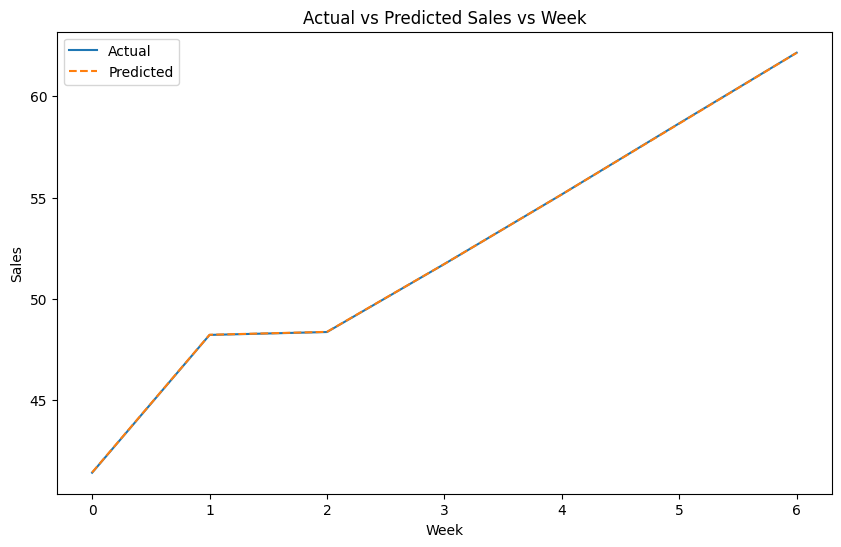

Best Model: RandomForestRegressor with Average Mean Squared Error: 694.932007530517


In [6]:
# Choose the best model based on cross-validated performance
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())  # Replace with the best model from your results
])

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Visualize the predictions of the best model
y_pred_best = best_model.predict(X)

# Plot the line chart using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='sales', data=df, label='Actual', err_style=None)
sns.lineplot(x='day_of_week', y=y_pred_best, data=df, label='Predicted', linestyle='dashed', err_style=None)
plt.title('Actual vs Predicted Sales vs Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.legend()
plt.show()

print(f'Best Model: {best_model.named_steps["model"].__class__.__name__} with Average Mean Squared Error: {avg_mse}')